In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import linregress
import seaborn as sns

In [2]:
data = pd.read_csv("clean_bike_data.csv")
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
30974,Theft of Bicycle,2019,10,22,13,45,20XX W 4TH AVE,Kitsilano,49.268138,-123.151383,2019-10-22 13:45:00
30975,Theft of Bicycle,2019,10,22,18,15,27XX W BROADWAY AVE,Kitsilano,49.264101,-123.167048,2019-10-22 18:15:00
30976,Theft of Bicycle,2019,10,22,20,34,63XX YEW ST,Kerrisdale,49.228779,-123.158805,2019-10-22 20:34:00
30977,Theft of Bicycle,2019,10,23,22,48,39XX W 38TH AVE,Dunbar-Southlands,49.237564,-123.191084,2019-10-23 22:48:00


       COUNT                                                                 \
YEAR    2003   2004   2005   2006   2007   2008   2009   2010   2011   2012   
MONTH                                                                         
1       96.0   42.0   51.0   66.0   57.0   44.0   29.0   52.0   39.0   76.0   
2       71.0   57.0   53.0   82.0   56.0   46.0   52.0   68.0   47.0   93.0   
3       76.0  100.0   83.0   93.0   71.0   61.0   43.0   89.0   58.0   91.0   
4       97.0   93.0   75.0   79.0   82.0   79.0  127.0  127.0   84.0  111.0   
5      114.0  109.0  133.0  103.0  108.0  134.0  186.0  143.0   99.0  174.0   
6      154.0  124.0  153.0  197.0  137.0  119.0  167.0  139.0  175.0  170.0   
7      191.0  198.0  162.0  242.0  169.0  178.0  285.0  231.0  297.0  251.0   
8      192.0  155.0  197.0  222.0  197.0  155.0  310.0  304.0  249.0  290.0   
9      158.0  130.0  180.0  134.0  130.0  159.0  183.0  222.0  171.0  237.0   
10     144.0  107.0  159.0  128.0  105.0  119.0  110

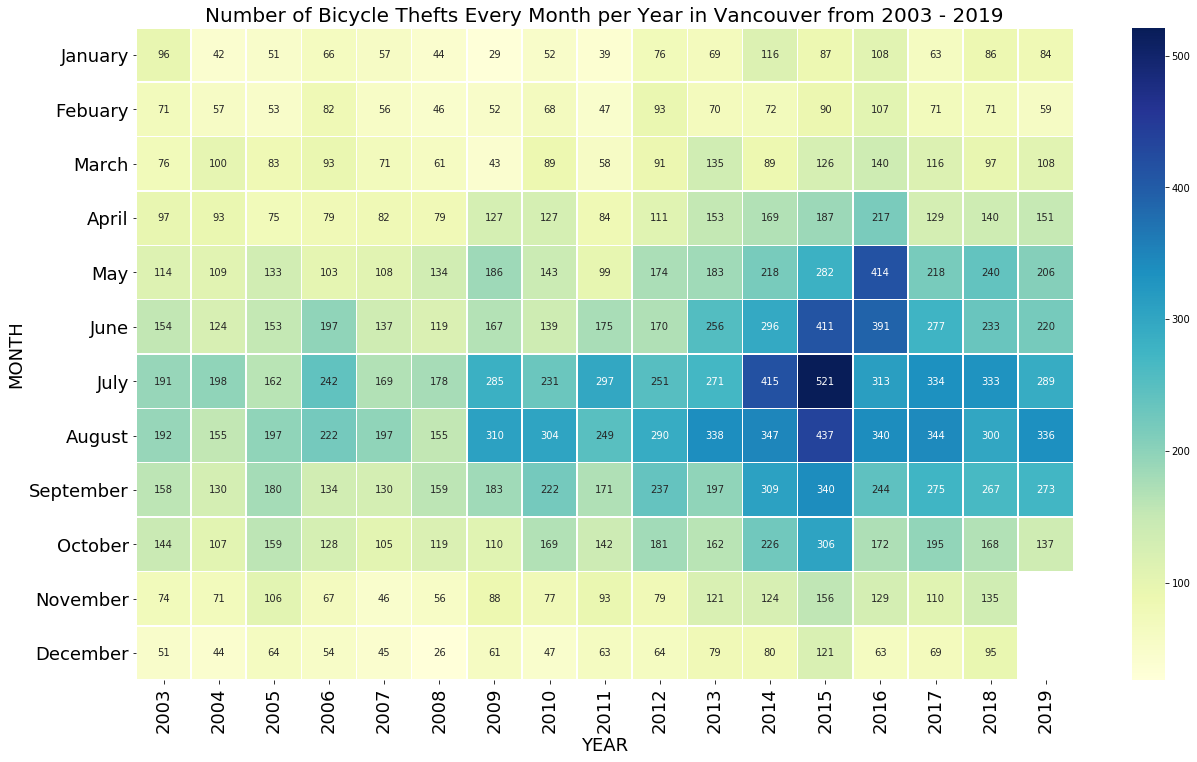

In [3]:
c = data.groupby([data["YEAR"], data["MONTH"]]).size().reset_index(name='COUNT')

test = c.pivot_table(["COUNT"], "MONTH", "YEAR")
print(test)

plt.figure(figsize=(21, 12))
x_axis_labels = [2003,
                 2004,
                 2005,
                 2006,
                 2007,
                 2008,
                 2009,
                 2010,
                 2011,
                 2012,
                 2013,
                 2014,
                 2015,
                 2016,
                 2017,
                 2018,
                 2019]
y_axis_labels = ["January",
                 "Febuary",
                 "March",
                 "April",
                 "May",
                 "June",
                 "July",
                 "August",
                 "September",
                 "October",
                 "November",
                 "December"]


g = sns.heatmap(test, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".0f",
            xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
g.set_xlabel("YEAR", size=18)
g.set_ylabel("MONTH", size=18)
g.set_title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019", size=20)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.setp(g.get_yticklabels(), rotation=0, fontsize=18)
plt.setp(g.get_xticklabels(), rotation=90, fontsize=18)
plt.savefig('heatmap.png')

In [4]:
data['DATETIME'] =  pd.to_datetime(data['DATETIME'], infer_datetime_format=True)

    MONTH  COUNT
0       1    437
1       2    485
2       3    616
3       4    759
4       5   1030
5       6   1190
6       7   1656
7       8   1732
8       9   1296
9      10   1041
10     11    585
11     12    392


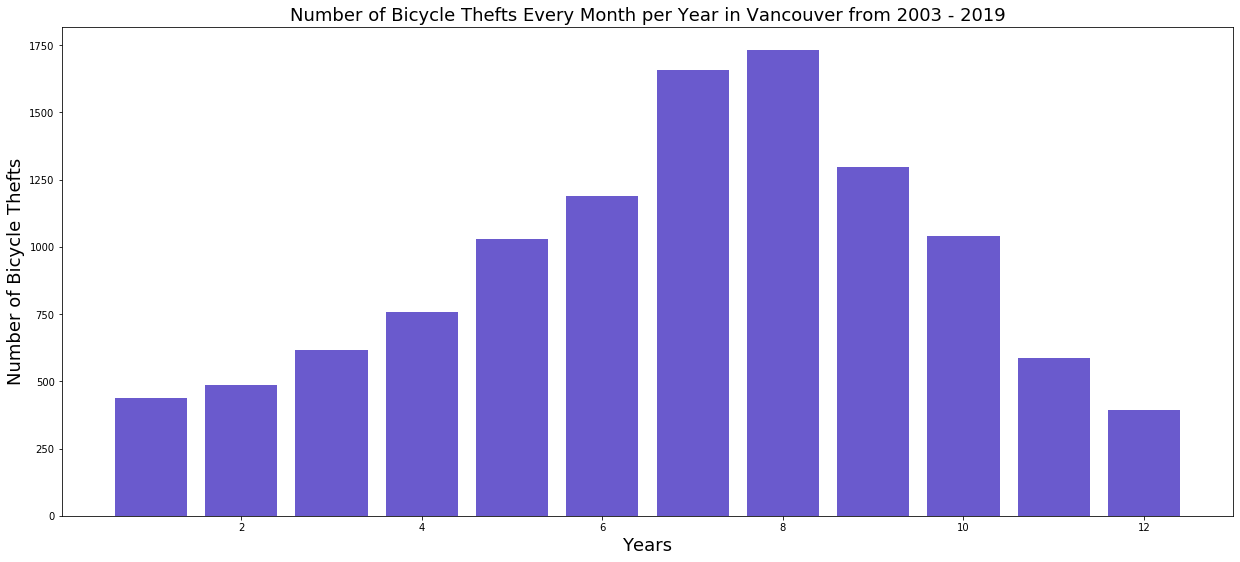

    MONTH  COUNT
0       1    728
1       2    680
2       3    960
3       4   1341
4       5   2034
5       6   2429
6       7   3024
7       8   2981
8       9   2313
9      10   1689
10     11    947
11     12    634


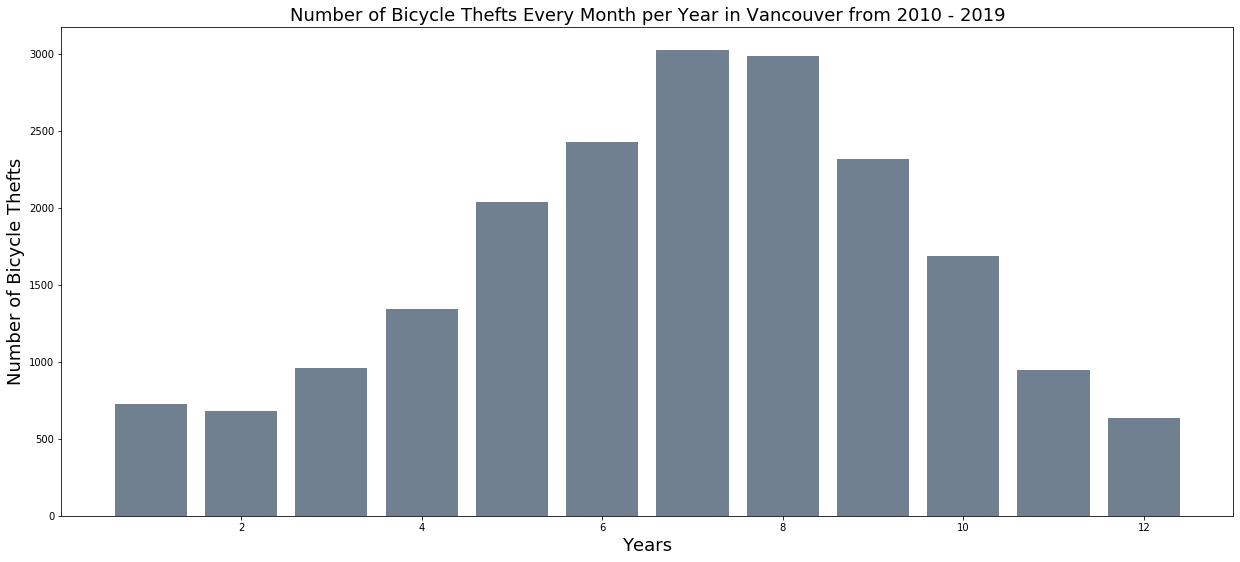

2003-2009 P_value:  0.5013521118763178
2009-2019 P_value:  0.2710594229989117
Mann P_value:  0.020202059794111847
Tail test:  1.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [5]:
# We have so much data, we have to apply the central limit theorem.
# To us, it looks pretty normal


early = data[data["YEAR"] < 2011]
early_agg = early.groupby(early["MONTH"]).size().reset_index(name="COUNT")
print(early_agg)
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.bar(early_agg['MONTH'], early_agg['COUNT'],
        color='slateblue')
plt.show()


late = data[data["YEAR"] >= 2011]
late_agg = late.groupby(late["MONTH"]).size().reset_index(name="COUNT")
print(late_agg)
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2010 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.bar(late_agg['MONTH'], late_agg['COUNT'],
        color='slategrey')
plt.show()

# Check if these two graphs are normal?
# They are both not normal
p_value = stats.normaltest(early_agg["COUNT"]).pvalue
print("2003-2009 P_value: ", p_value)

p_value = stats.normaltest(late_agg["COUNT"]).pvalue
print("2009-2019 P_value: ", p_value)

# The Central Limit Theorem, it's probably good enough but let's do one more test

# Our data is sortable, so we can use the mannwhitney u test
utest_p = stats.mannwhitneyu(early_agg["COUNT"].sort_values(), late_agg["COUNT"].sort_values()).pvalue
print("Mann P_value: ", utest_p)


ttest = stats.ttest_ind(early_agg['MONTH'], late_agg['MONTH'])
print("Tail test: ", ttest.pvalue)

    MONTH  COUNT
0       1   1165
1       2   1165
2       3   1576
3       4   2100
4       5   3064
5       6   3619
6       7   4680
7       8   4713
8       9   3609
9      10   2730
10     11   1532
11     12   1026


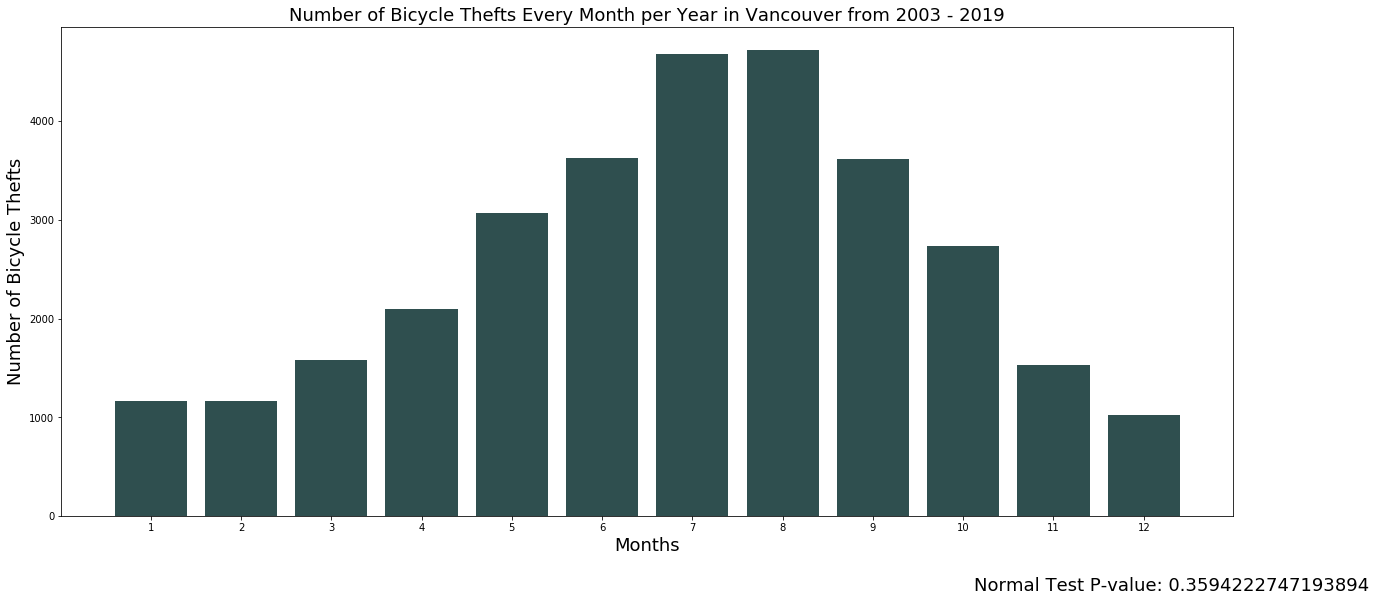

In [6]:
dd = data.groupby(data["MONTH"]).size().reset_index(name="COUNT")
print(dd)

# Calculate P-value from Normal Test
p_value = stats.normaltest(dd["COUNT"]).pvalue

# Configure Plots
plt.figure(figsize=(21, 9))
plt.bar(dd['MONTH'], dd['COUNT'],
        color='darkslategrey')
plt.xticks(dd['MONTH'])
plt.xlabel("Months",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.figtext(0.99, 0.01,
            'Normal Test P-value: ' + str(p_value),
            horizontalalignment='right',
            fontsize=18)
plt.show()

Data Frame:       YEAR  MONTH  COUNT  PREDICTION
0    2003      1     96   94.608009
1    2003      2     71   94.608009
2    2003      3     76   94.608009
3    2003      4     97   94.608009
4    2003      5    114   94.608009
..    ...    ...    ...         ...
197  2019      6    220  213.289831
198  2019      7    289  213.289831
199  2019      8    336  213.289831
200  2019      9    273  213.289831
201  2019     10    137  213.289831

[202 rows x 4 columns]
Linear Regression p-value: 2.1636940257922764e-08


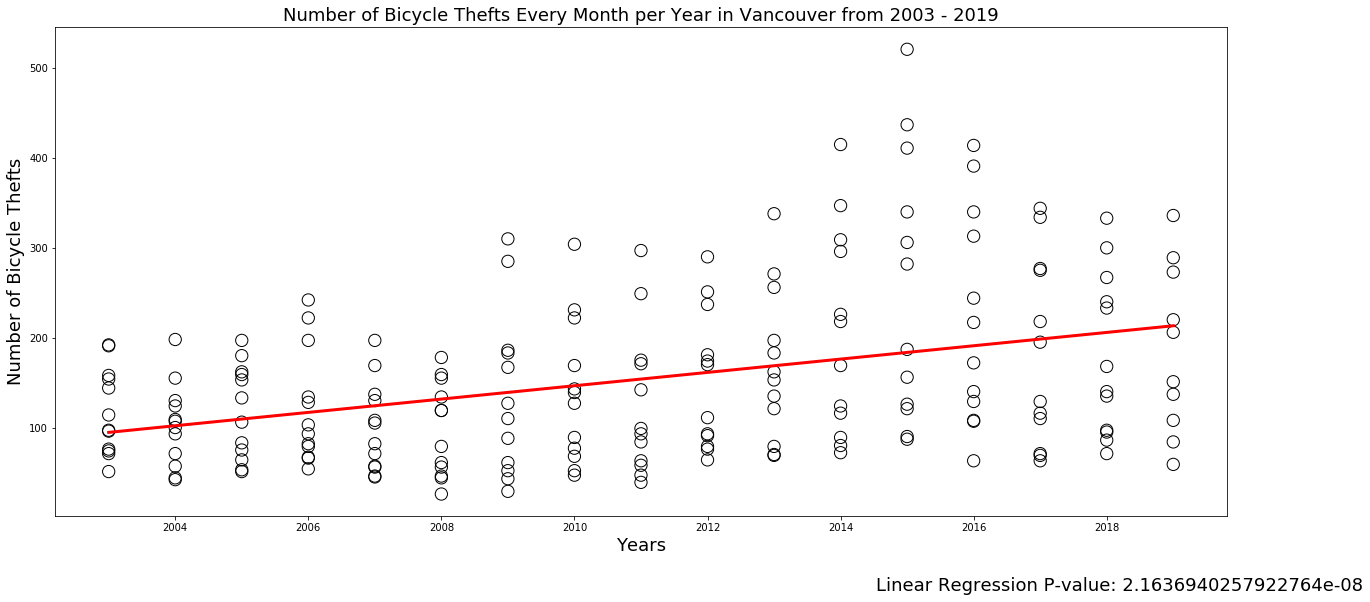

In [7]:
# Create a dataframe aggregating the year and month count
c = data.groupby([data["YEAR"], data["MONTH"]]).size().reset_index(name='COUNT')

# Calculate the linear regression
r = linregress(c["YEAR"], c['COUNT'])
c['PREDICTION'] = r.slope * c['YEAR'] + r.intercept

print("Data Frame: ", c)
print("Linear Regression p-value:", r.pvalue)


# Configure Plot
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.scatter(c['YEAR'], c['COUNT'],
            color='k',
            marker='o',
            facecolors='none',
            edgecolors='k',
            s=150)
plt.plot(c['YEAR'], c["PREDICTION"],
         'r-',
         linewidth=3)
plt.figtext(0.99, 0.01,
            'Linear Regression P-value: ' + str(r.pvalue),
            horizontalalignment='right',
            fontsize=18)
plt.savefig('yearly_linear_regression.png')